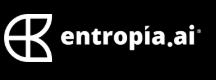

### Entropía AI Candidates Test  
Data Scientist Test: Time Series Forecasting  
**Miguel Ángel Zamorano Presa**

### Section 1: Theory
 **1. Name two advantages and two disadvantages of using LSTM over ARIMA for time
 series forecasting.**  
Disadvantages:  
1. LSTM architecture is Black box model ,that means that its hard to  attribute predictions to specific factors or patterns 
2. Computational complexity:Training LSTM architectures are computationally intensive and often requires GPU, finetunning hyperparameters are necesarry for minimize vanish gradient and overfitting.

Advantages:  
1. LSTM is able to learn non linear patterns,less sensitive to non stationarity, heavy tailed distributions,shift distributions, in comparison to ARIMA models but also we still need to take care for scale,missing values and noisy data,those factors will result in spurious predictions  
2. LSTM introduces memory cells and gating mechanism to selectively retain or discard info over secuences adressing the vanishing gradient problem of RNN enabling long term learning. 

 **2. Why is standard k-fold cross-validation not suitable for time series data? What tech
nique would you recommend instead?**  


Cross validating in TS is tricky, you can't use traditional K fold because you will end up training on  future samples,instead you can use timeseries split of sklearn, in which each fold the training indices will always come before before the test indices

### Section 2: Case Study

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults, ARIMAResultsWrapper
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from pathlib import Path
import json


###  Index
1. Results Catalog 
2. Data Cleanning
3. Models:
    1. Baseline Model(Arima)
    2. LSTM
    3. Prophet
    4. Metrics and report results
### apendix
1. EDA Results






### Results Catalog

### Data Cleanning  

1. EDA

**1st DataSet Version**
1. Drop rows with Ventas = 0
2. duplicate treatment
3. Normalize  'Ventas' values with MinMax Scaler
4. add new columns
    1. Split and add date columns

     
**2nd DataSet Version**
1. same procedure + new columns
    1. Feature Importance (xgboost)
    2. trend,seasonality, maew for cluster ownership


Data cleanning

In [ ]:
base_dir = Path().resolve()/'Ventas_.csv'
df = pd.read_csv(base_dir,index_col=None, parse_dates=['Fecha'] )
df = df[df['Ventas'] != 0].copy()
df['Estado'] = df['Estado'].astype('category')
df = df.sort_values(by=['Fecha','Estado','Ventas'])

1st Dataset Version

In [8]:
df1 = df.copy()
MinMaxScaler = MinMaxScaler()
Sx = MinMaxScaler.fit_transform(df['Ventas'].values.reshape(-1, 1))
df1['Ventas'] = Sx.flatten()

df1['año'] = df['Fecha'].dt.year
df1['mes'] = df['Fecha'].dt.month
df1['día_semana'] = df['Fecha'].dt.day_name()
df1['semana'] = df['Fecha'].dt.isocalendar().week
df1['mes_nombre'] = df['Fecha'].dt.month_name()

ts_decompose = seasonal_decompose(df['Ventas'], model='additive', period=12)
seasonal_decompose = ts_decompose.seasonal
df1['seasonal'] = seasonal_decompose
df1['trend'] = ts_decompose.trend
df1['residual'] = ts_decompose.resid
df1['observed'] = ts_decompose.observed
df1.to_csv(base_dir.parent/'dataset_v1.csv', index=False)


2nd datsets version

In [ ]:
df2 = df1.copy()
df2['meaw'] = 

### EDA

In [ ]:
print(df.info())
print('----------------------------------------------------------')
print(df.describe())
print('----------------------------------------------------------')
print(f'duplicated rows:  {df.duplicated().sum()}' )